<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h1> EDA & ML on Fish Market🐟 </h1> </center> </div>


<center> <img src="https://cdn.pixabay.com/photo/2016/08/24/17/02/fish-1617442_960_720.jpg"></center>

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <h3><center> 0. About Dataset & goal of this notebook</center> </h3> </div>


Fish market dataset was created by SAS Ondemand for Academics, record 7 different fish species in fish market sales, and contains 7 features.

each features are about...

1. Species: Name of the species
2. Weight: Weight of the individual fish in grams
3. Length1: Vertical length in cm
4. Length2: Diagnoal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Width in cm


<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> Contents </h3> </center> </div>

0. About dataset & Goal of this notebook
1. Import necessary Libraries
2. Data preprocessing
3. EDA


<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> 1. Import necessary Libraries </h3> </center> </div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


In [2]:
df = pd.read_csv("../input/fish-market/Fish.csv")
print(df.head())
print(df.shape)

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
(159, 7)


In [3]:
df = df.rename(columns = {"Species":"target"})

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> 2. Data preprocessing </h3> </center> </div>

I belive that this dataset must be well defined, but checking dataset a time to certain it.

<h3>Checking missing values</h3>

In [4]:
df.isnull().sum().sort_values()

target     0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no missing value😀

<h3>Checking outlier</h3>

In [5]:
col_list = list(df.columns)
col_list.remove('target')
col_list

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

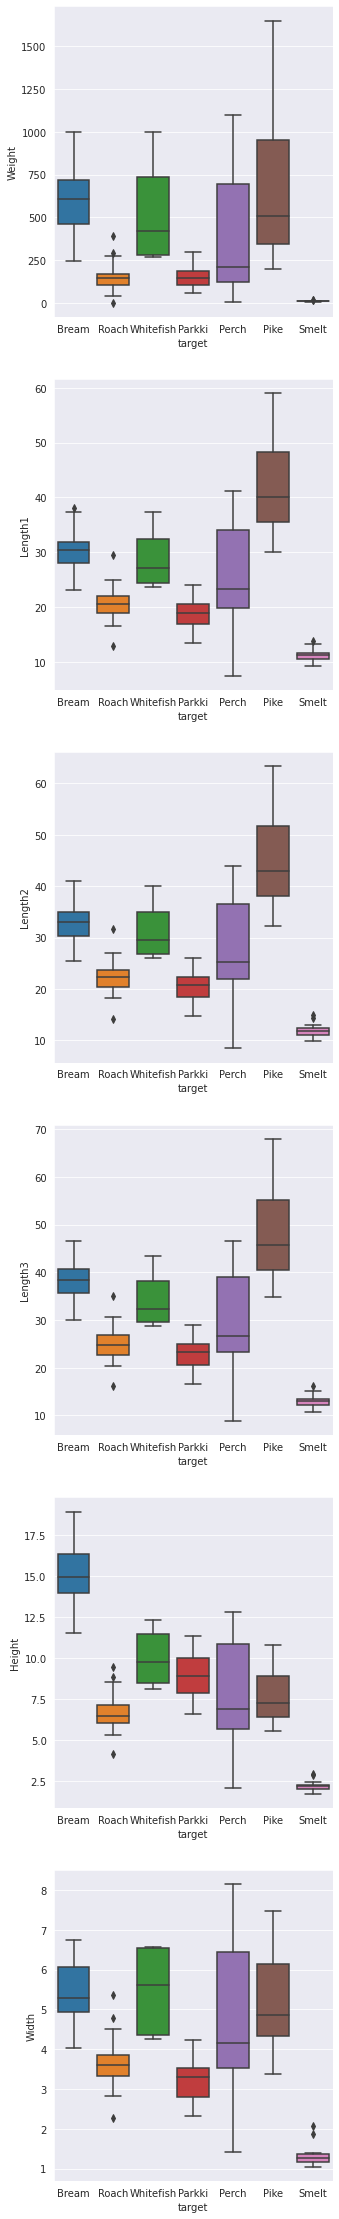

In [6]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=6, figsize=(5,40))

for i,c in enumerate(col_list):
    sns.boxplot(x='target',y=c, data=df, ax=ax[int(i)])
    

There are some overliers in Roach, Smelt.

In [7]:
#delete outlier
'''
df_outlier = df[(abs(df[col_list]-np.mean(df[col_list]))/np.std(df[col_list])<=3)].reset_index()
df_outlier['target'] = df['target']
df = df_outlier.drop(['index'], axis=1)
df.head()
'''

#I don't know the reason but when I used this code to delete outliers, it caused more outliers

"\ndf_outlier = df[(abs(df[col_list]-np.mean(df[col_list]))/np.std(df[col_list])<=3)].reset_index()\ndf_outlier['target'] = df['target']\ndf = df_outlier.drop(['index'], axis=1)\ndf.head()\n"

<h2>Feature scaling</h2>

<h3>Standaridization</h3>

In [8]:
df_std = (df[col_list]-df[col_list].mean())/df[col_list].std()
df_std.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.436692,-0.304825,-0.281414,-0.105686,0.594700,-0.235784
1,-0.302606,-0.224797,-0.197430,-0.002329,0.818674,-0.066369
2,-0.162933,-0.234801,-0.178767,-0.010942,0.794830,0.165271
3,-0.098683,0.005285,0.054522,0.195772,0.877001,0.022550
4,0.088479,0.025292,0.054522,0.238837,0.810275,0.425028


<h3>Min-Max scaling</h3>

In [9]:
df_std[col_list] = (df_std[col_list]-df_std[col_list].min())/(df_std[col_list].max()-df_std[col_list].min())
df_std.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004


In [10]:
df_std.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.241410,0.364023,0.363922,0.378835,0.420382,0.475006
std,0.216957,0.194106,0.194842,0.196119,0.248784,0.237625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.072727,0.224272,0.229091,0.242399,0.244733,0.329563
50%,0.165455,0.343689,0.343636,0.347973,0.351601,0.451187
75%,0.393939,0.489320,0.492727,0.521115,0.617433,0.639504
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_std['target'] = df['target']
df = df_std
df.head()

,Weight,Length1,Length2,Length3,Height,Width,target
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978,Bream
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235,Bream
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279,Bream
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365,Bream
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004,Bream


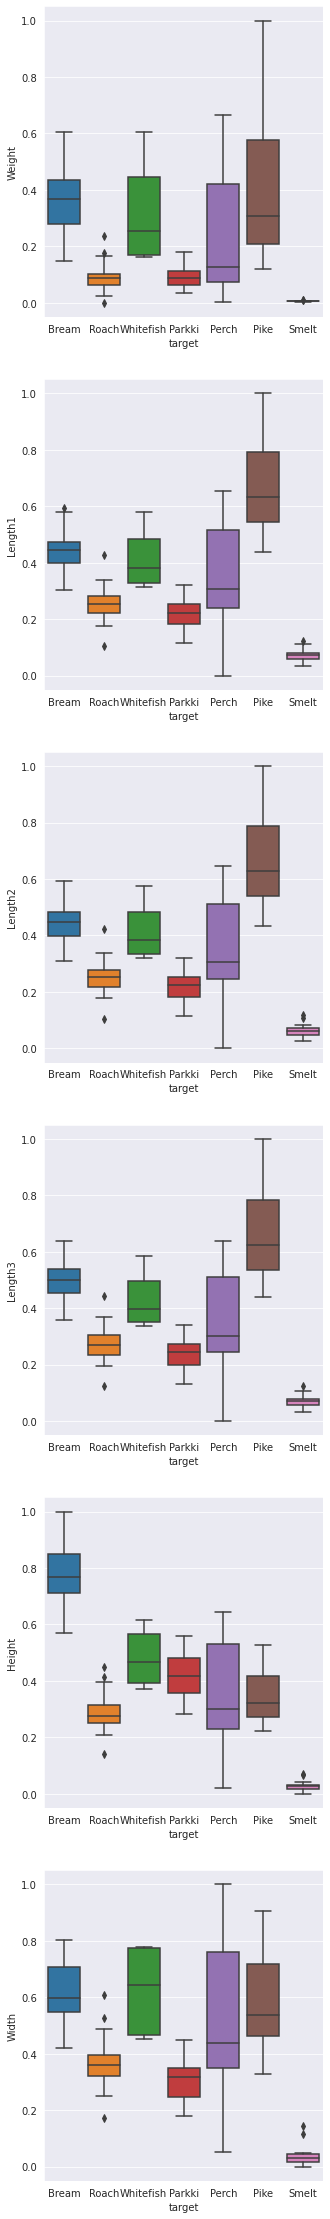

In [12]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=6, figsize=(5,40))

for i,c in enumerate(col_list):
    sns.boxplot(x='target',y=c, data=df, ax=ax[int(i)])
    

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> 3. EDA </h3> </center> </div>


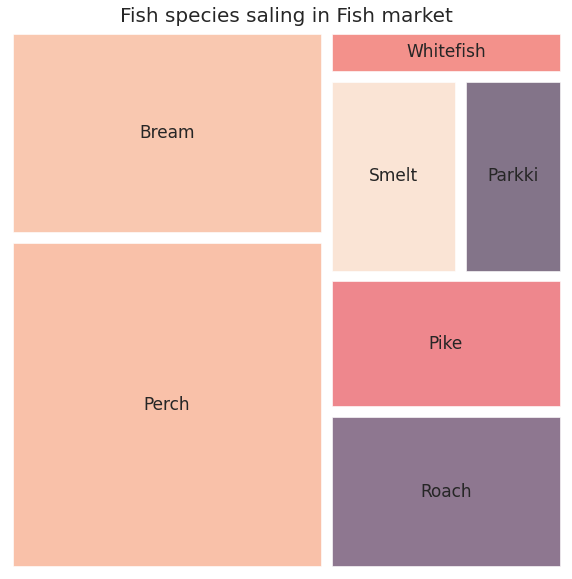

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: target, dtype: int64

In [13]:
df_species = df['target'].value_counts()
df_species.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(1, figsize=(10,10))
squarify.plot(sizes=df_species.values, 
              label=df_species.index,
              #color= ,
              text_kwargs={'fontsize':17},
              pad = True,
              alpha=0.6)
plt.title("Fish species saling in Fish market", fontsize=20)
plt.axis('off')
plt.show()
df_species

In [14]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,target
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978,Bream
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235,Bream
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279,Bream
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365,Bream
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004,Bream


Change feature name "Species" as "target"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   target   159 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


What kinds of fish in the market?
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: target, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


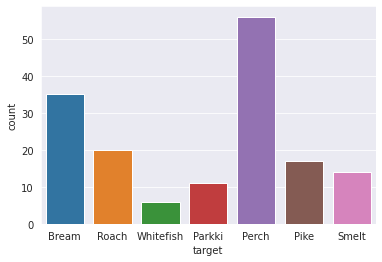

In [16]:
sns.countplot(df['target'])
print("What kinds of fish in the market?")
print(df.target.value_counts())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

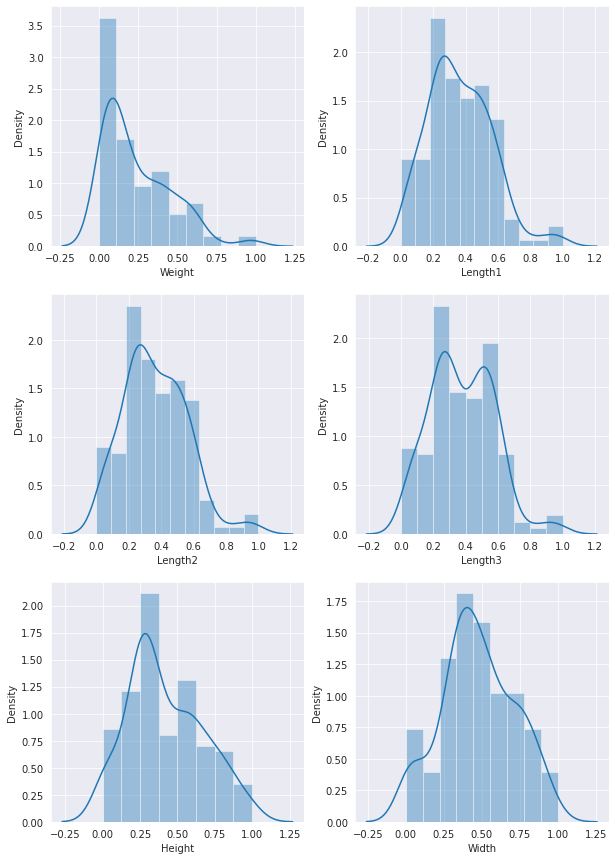

In [17]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

for i,c in enumerate(col_list):
    sns.distplot(df[c], ax=ax[int(i/2),int(i%2)])
    

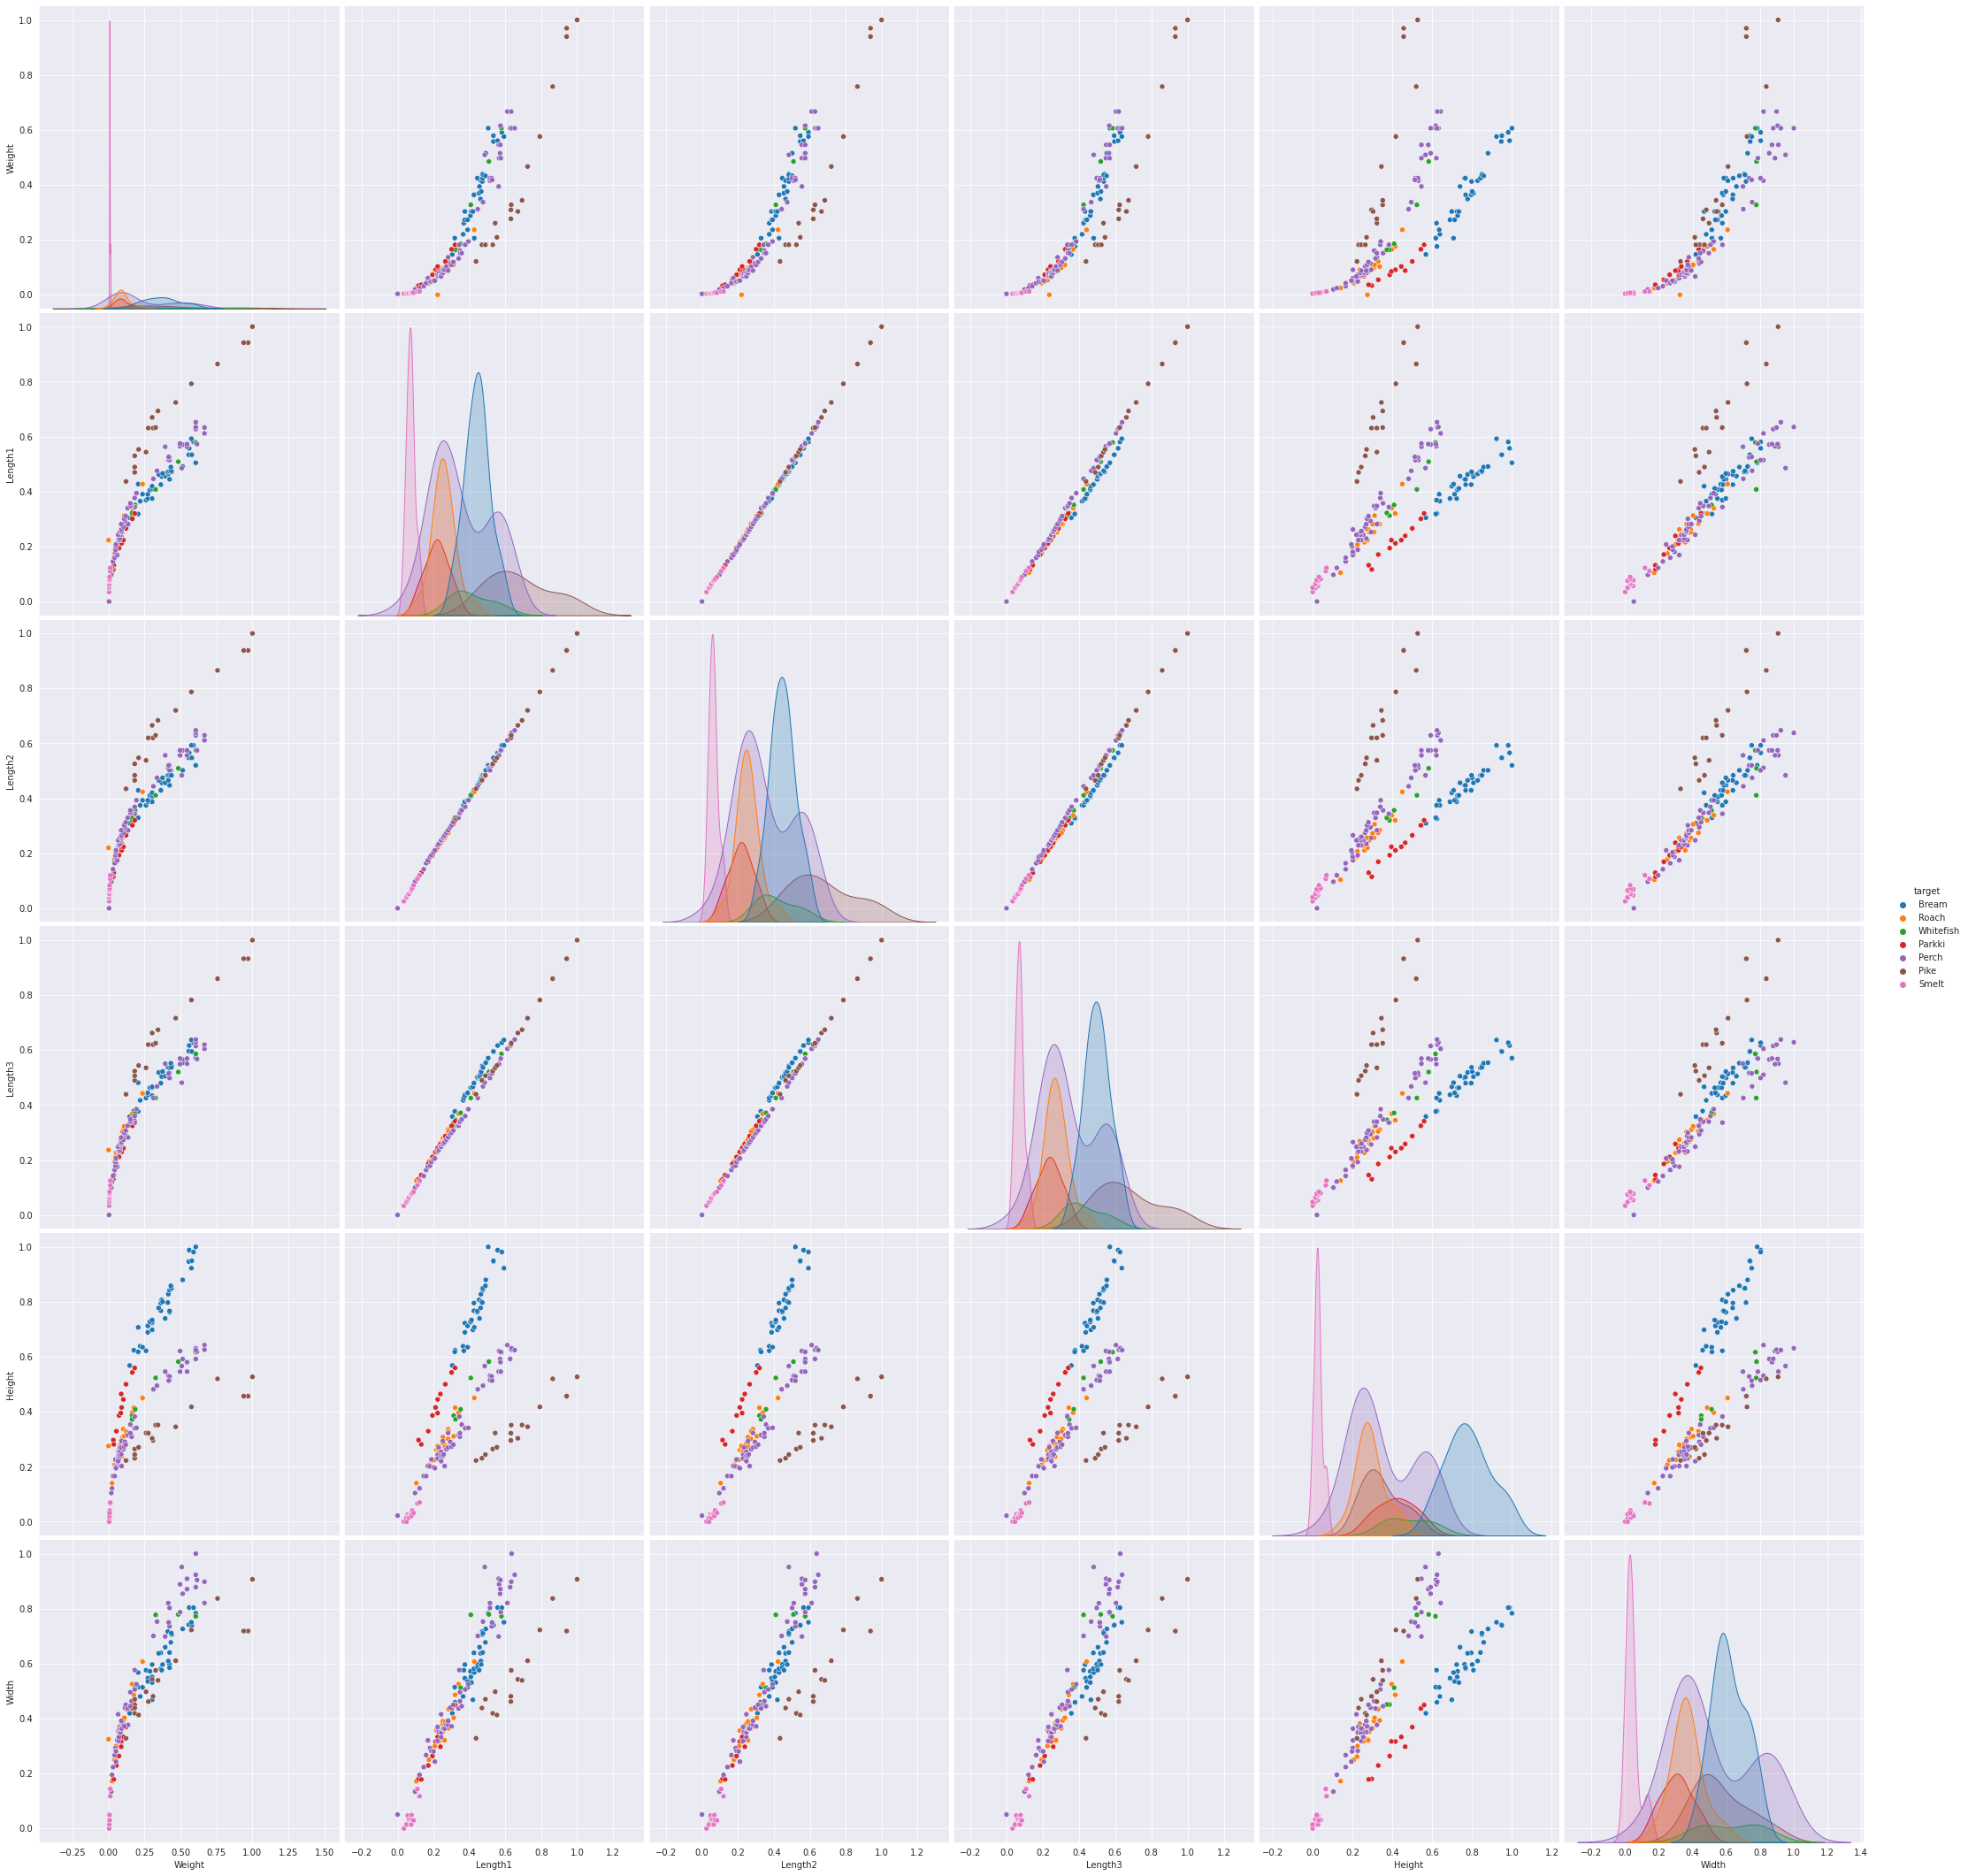

In [18]:
sns.pairplot(df, hue='target', height=5)

<AxesSubplot:>

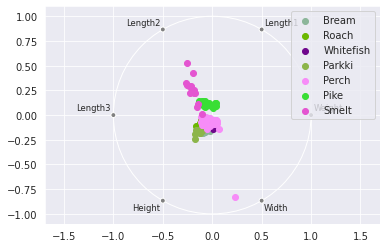

In [19]:
import pandas.plotting as pdplt
pdplt.radviz(df, 'target')

<AxesSubplot:>

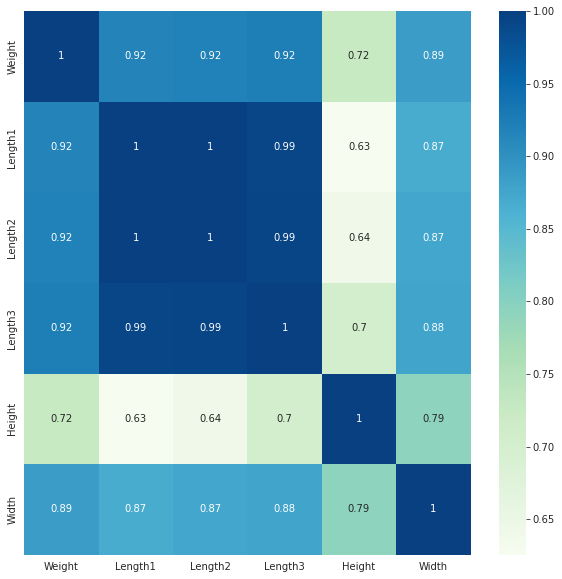

In [20]:
plt.figure(figsize=(10,10))
correlation = df.corr()
sns.heatmap(correlation, cmap='GnBu', annot = True)

<pre>
Thx for watching!
I will appreciate if you give me a feedback🥰
</pre>